In [1]:
import EOSutils as meos

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable

mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil
import copy

from scipy import interpolate
from scipy.linalg import lstsq as scipy_lstsq
from scipy.ndimage import gaussian_filter
import scipy.integrate as integrate
import decimal 

%matplotlib inline

In [2]:
profiles = meos.load_sample_planet_profiles(Minit=np.array((1.09,7.59,20.0)), Rinit=2.0, Zinit=0.025, comps=['uniform','inert_core'], Sinit=np.array((9.0,11.0)), alphas=2.0, ages=np.array((1.e6,1.e10)))


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/335567435.py:4: RuntimeWarning: overflow encountered in power
  meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,plot_tracks=True)


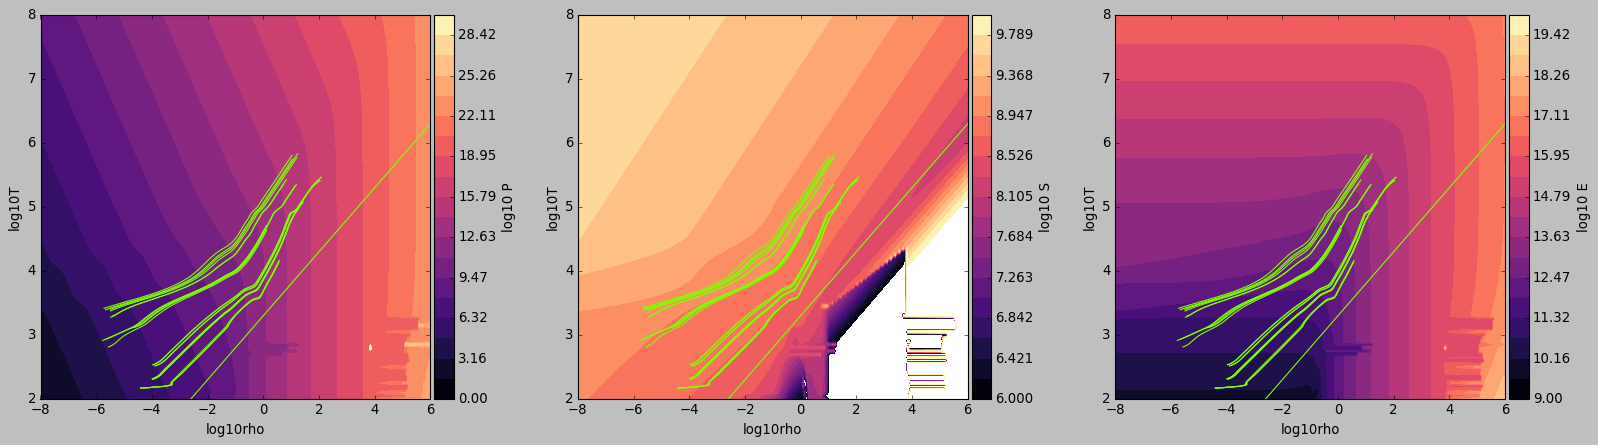

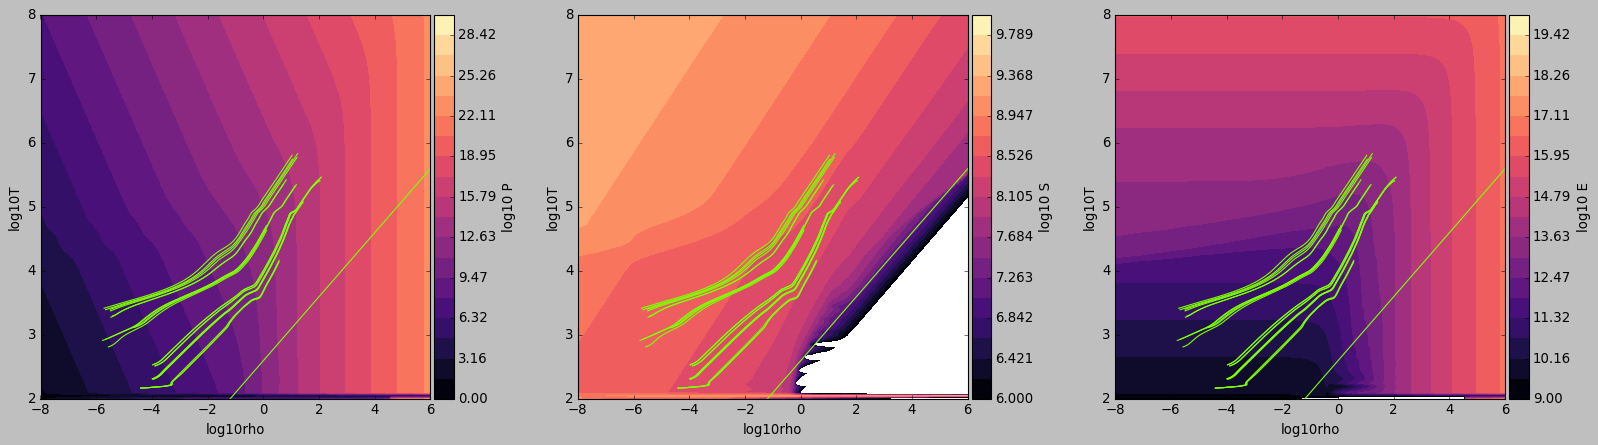

In [27]:
smoothing_kernel = 10

cms19_H = meos.CMStable("../2021_chabrier+_tables/TABLE_H_Trho_v1",units='cgs',F_smoothing_kernel=smoothing_kernel)
meos.plot_PSE(cms19_H, 10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Ugrid,plot_tracks=True)

cms19_He = meos.CMStable("../2021_chabrier+_tables/TABLE_HE_Trho_v1",units='cgs',F_smoothing_kernel=smoothing_kernel)
#meos.plot_PSE(cms19_He, 10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Ugrid,plot_tracks=True)

new_P, new_S, new_E = meos.interpolate_problematic_values(cms19_He,bad_rho_idxs=np.arange(193,203), bad_T_idxs=[79,80,81])
meos.plot_PSE(cms19_He, 10**new_P,10**new_S,10**new_E,plot_tracks=True)

/Users/emily/Documents/astro/giant_planets/MESA_EoS/EOSutils/EOSutils/EOSutils.py:167: RuntimeWarning: invalid value encountered in log10
  self.F_log10Sgrid = np.log10(self.F_Sgrid)


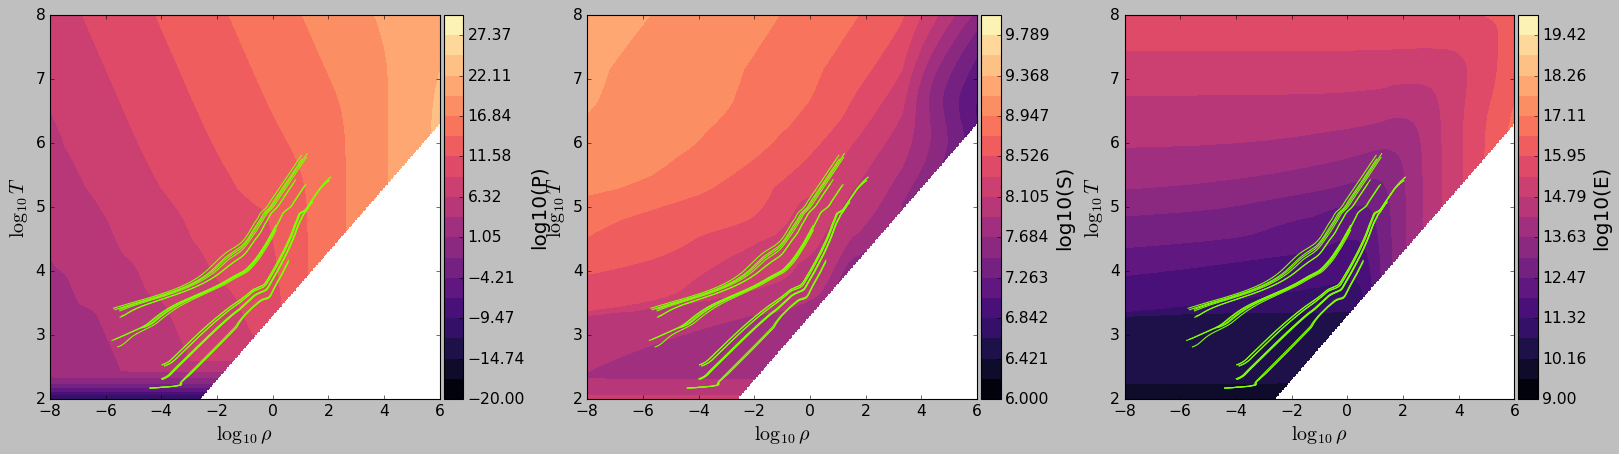

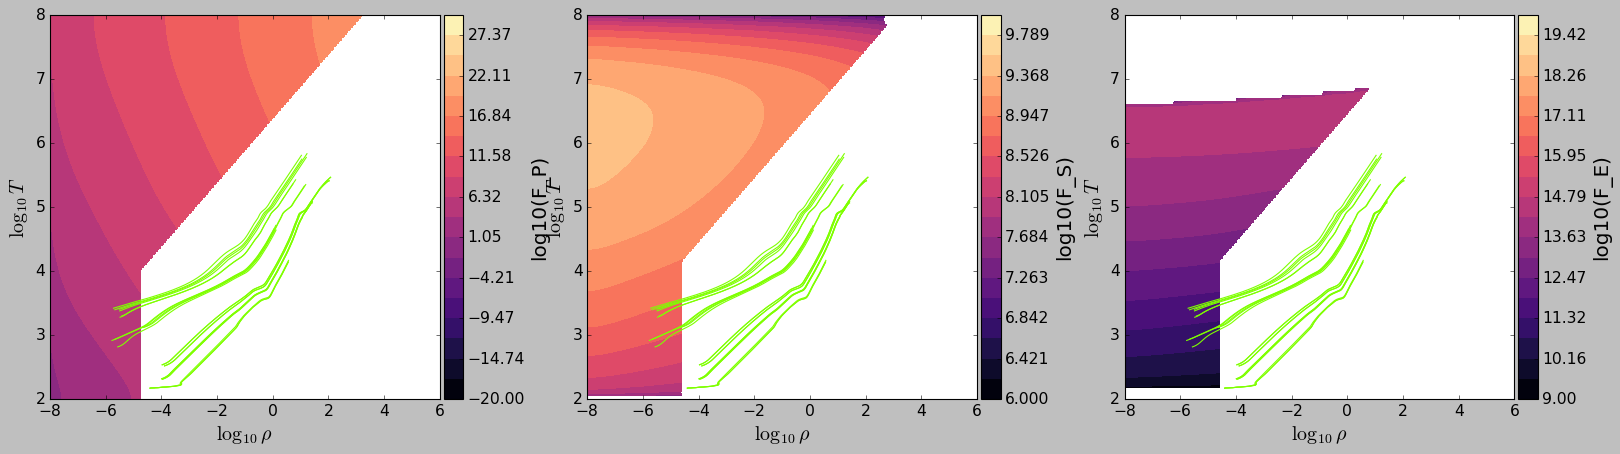

In [28]:
my_Z = meos.read_MESAtable("../my_MESAformat_tables/mesa-planetblend_100z00x.data")
my_Z_Trho = meos.reshapeQTgrid(my_Z,-8,6)
#print(type(my_Z_Trho))
#print(np.shape(my_Z_Trho))

Z = meos.simple_table()
Z.X = 0.
Z.Y = 0.
Z.Z = 1.

Z.log10Tgrid = my_Z_Trho[:,:,0].T
Z.log10rhogrid = my_Z_Trho[:,:,-1].T

Z.log10Pgrid = my_Z_Trho[:,:,1].T
Z.log10Sgrid = my_Z_Trho[:,:,3].T
Z.log10Ugrid = my_Z_Trho[:,:,2].T

Z.compute_atomic_number()
Z.compute_F(F_smoothing_kernel=smoothing_kernel)

meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.log10Pgrid,Z.log10Sgrid,Z.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(-20,30),(6,10),(9,20)],
                                levels=20,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(P)','log10(S)','log10(E)'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=False, savename=None)



meos.contourf_sublots_with_colorbars(nRow=1, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[Z.F_log10Pgrid,Z.F_log10Sgrid,Z.F_log10Egrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(-20,30),(6,10),(9,20)],
                                levels=20,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['log10(F_P)','log10(F_S)','log10(F_E)'],
                                cmap='magma', vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=False, savename=None)



# what if "control" EoS were exactly the same distance away from the original as the F version, but in the other direction?

In [29]:
cms19_H_P_diff = 10**cms19_H.F_log10Pgrid - 10**cms19_H.log10Pgrid
cms19_H_S_diff = 10**cms19_H.F_log10Sgrid - 10**cms19_H.log10Sgrid
cms19_H_E_diff = 10**cms19_H.F_log10Egrid - 10**cms19_H.log10Egrid

cms19_He_P_diff = 10**cms19_He.F_log10Pgrid - 10**cms19_He.log10Pgrid
cms19_He_S_diff = 10**cms19_He.F_log10Sgrid - 10**cms19_He.log10Sgrid
cms19_He_E_diff = 10**cms19_He.F_log10Egrid - 10**cms19_He.log10Egrid

Z_P_diff = 10**Z.F_log10Pgrid - 10**Z.log10Pgrid
Z_S_diff = 10**Z.F_log10Sgrid - 10**Z.log10Sgrid
Z_E_diff = 10**Z.F_log10Egrid - 10**Z.log10Egrid


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/38595158.py:2: RuntimeWarning: overflow encountered in power
  cms19_H_S_diff = 10**cms19_H.F_log10Sgrid - 10**cms19_H.log10Sgrid
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/38595158.py:3: RuntimeWarning: overflow encountered in power
  cms19_H_E_diff = 10**cms19_H.F_log10Egrid - 10**cms19_H.log10Egrid


In [46]:
scaling_fac = 1

control_H = meos.simple_table()
control_H.X = 1.
control_H.Y = 0.
control_H.Z = 0.
control_H.log10Tgrid = cms19_H.log10Tgrid
control_H.log10rhogrid = cms19_H.log10rhogrid
control_H.log10Pgrid = np.log10( 10**cms19_H.log10Pgrid - scaling_fac*cms19_H_P_diff )
control_H.log10Sgrid = np.log10( 10**cms19_H.log10Sgrid - scaling_fac*cms19_H_S_diff )
control_H.log10Ugrid = np.log10( 10**cms19_H.log10Egrid - scaling_fac*cms19_H_E_diff )
control_H.compute_atomic_number()
control_H.compute_F(F_smoothing_kernel=smoothing_kernel)

control_He = meos.simple_table()
control_He.X = 0.
control_He.Y = 1.
control_He.Z = 0.
control_He.log10Tgrid = cms19_He.log10Tgrid
control_He.log10rhogrid = cms19_He.log10rhogrid
control_He.log10Pgrid = np.log10( 10**cms19_He.log10Pgrid - scaling_fac*cms19_He_P_diff )
control_He.log10Sgrid = np.log10( 10**cms19_He.log10Sgrid - scaling_fac*cms19_He_S_diff )
control_He.log10Ugrid = np.log10( 10**cms19_He.log10Egrid - scaling_fac*cms19_He_E_diff )
control_He.compute_atomic_number()
control_He.compute_F(F_smoothing_kernel=smoothing_kernel)

control_Z = meos.simple_table()
control_Z.X = 0.
control_Z.Y = 0.
control_Z.Z = 1.
control_Z.log10Tgrid = Z.log10Tgrid
control_Z.log10rhogrid = Z.log10rhogrid
control_Z.log10Pgrid = np.log10( 10**Z.log10Pgrid - scaling_fac*Z_P_diff )
control_Z.log10Sgrid = np.log10( 10**Z.log10Sgrid - scaling_fac*Z_S_diff )
control_Z.log10Ugrid = np.log10( 10**Z.log10Egrid - scaling_fac*Z_E_diff )
control_Z.compute_atomic_number()
control_Z.compute_F(F_smoothing_kernel=smoothing_kernel)


/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/3548601843.py:9: RuntimeWarning: invalid value encountered in log10
  control_H.log10Pgrid = np.log10( 10**cms19_H.log10Pgrid - scaling_fac*cms19_H_P_diff )
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/3548601843.py:10: RuntimeWarning: overflow encountered in power
  control_H.log10Sgrid = np.log10( 10**cms19_H.log10Sgrid - scaling_fac*cms19_H_S_diff )
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/3548601843.py:10: RuntimeWarning: invalid value encountered in log10
  control_H.log10Sgrid = np.log10( 10**cms19_H.log10Sgrid - scaling_fac*cms19_H_S_diff )
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/3548601843.py:11: RuntimeWarning: overflow encountered in power
  control_H.log10Ugrid = np.log10( 10**cms19_H.log10Egrid - scaling_fac*cms19_H_E_diff )
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/3548601843.py:11: RuntimeWarning: invalid value encoun

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/1206553552.py:4: RuntimeWarning: overflow encountered in power
  zs=[10**cms19_H.F_log10Pgrid/10**cms19_H.log10Pgrid,10**cms19_H.F_log10Sgrid/10**cms19_H.log10Sgrid,10**cms19_H.F_log10Egrid/10**cms19_H.log10Ugrid,
/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/1206553552.py:5: RuntimeWarning: overflow encountered in power
  10**control_H.log10Pgrid/10**cms19_H.log10Pgrid,10**control_H.log10Sgrid/10**cms19_H.log10Sgrid,10**control_H.log10Egrid/10**cms19_H.log10Ugrid],


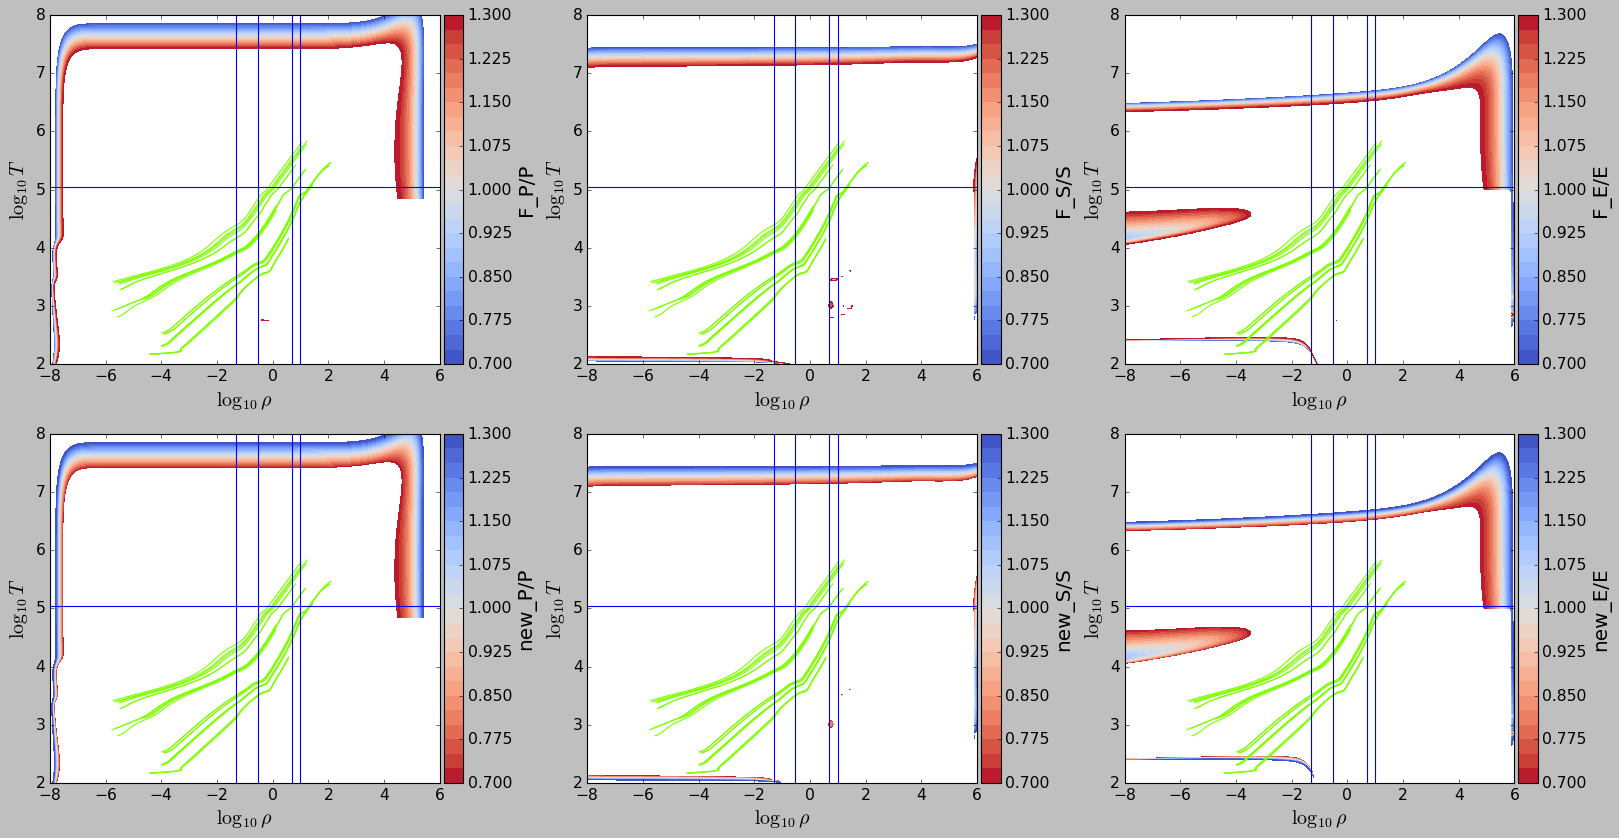

In [47]:
meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=cms19_H.log10rhogrid,
                                ys=cms19_H.log10Tgrid,
                                zs=[10**cms19_H.F_log10Pgrid/10**cms19_H.log10Pgrid,10**cms19_H.F_log10Sgrid/10**cms19_H.log10Sgrid,10**cms19_H.F_log10Egrid/10**cms19_H.log10Ugrid,
                                    10**control_H.log10Pgrid/10**cms19_H.log10Pgrid,10**control_H.log10Sgrid/10**cms19_H.log10Sgrid,10**control_H.log10Egrid/10**cms19_H.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3)],
                                #zlims=None,
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['F_P/P','F_S/S','F_E/E','new_P/P','new_S/S','new_E/E'],
                                cmap=['coolwarm','coolwarm','coolwarm','coolwarm_r','coolwarm_r','coolwarm_r'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='H', plot_interpolation_lines=True, savename=None)

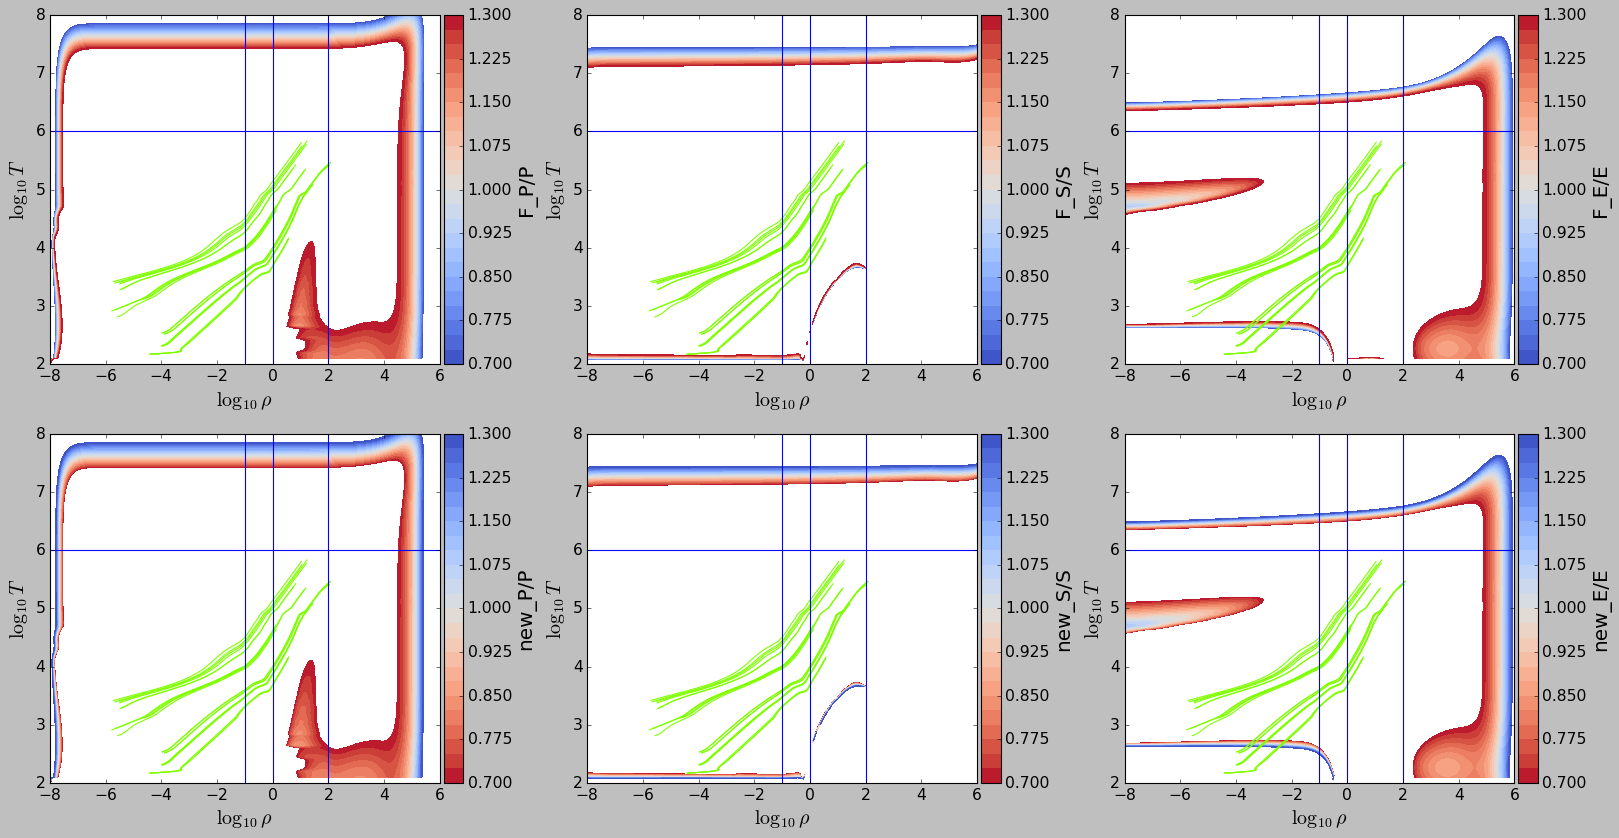

In [48]:
meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=cms19_He.log10rhogrid,
                                ys=cms19_He.log10Tgrid,
                                zs=[10**cms19_He.F_log10Pgrid/10**cms19_He.log10Pgrid,10**cms19_He.F_log10Sgrid/10**cms19_He.log10Sgrid,10**cms19_He.F_log10Egrid/10**cms19_He.log10Ugrid,
                                    10**control_He.log10Pgrid/10**cms19_He.log10Pgrid,10**control_He.log10Sgrid/10**cms19_He.log10Sgrid,10**control_He.log10Egrid/10**cms19_He.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=[(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3),(0.7,1.3)],
                                #zlims=None,
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['F_P/P','F_S/S','F_E/E','new_P/P','new_S/S','new_E/E'],
                                cmap=['coolwarm','coolwarm','coolwarm','coolwarm_r','coolwarm_r','coolwarm_r'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='He', plot_interpolation_lines=True, savename=None)

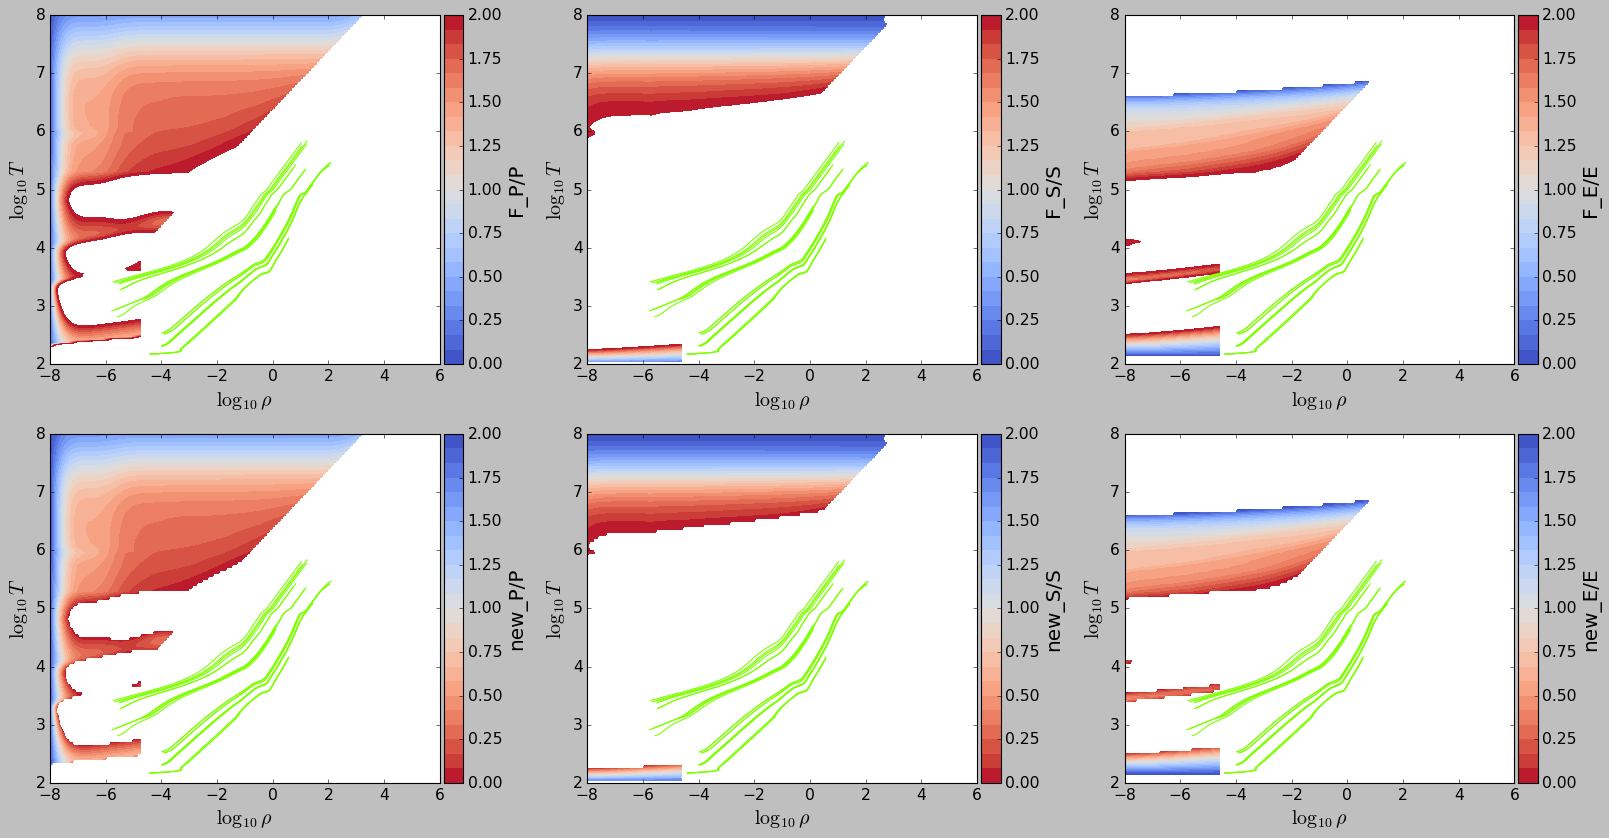

In [49]:
meos.contourf_sublots_with_colorbars(nRow=2, nCol=3, 
                                xs=Z.log10rhogrid,
                                ys=Z.log10Tgrid,
                                zs=[10**Z.F_log10Pgrid/10**Z.log10Pgrid,10**Z.F_log10Sgrid/10**Z.log10Sgrid,10**Z.F_log10Egrid/10**Z.log10Ugrid,
                                    10**control_Z.log10Pgrid/10**Z.log10Pgrid,10**control_Z.log10Sgrid/10**Z.log10Sgrid,10**control_Z.log10Egrid/10**Z.log10Ugrid],
                                xlims=(-8,6),
                                ylims=(2,8),
                                zlims=(0,2),
                                #zlims=None,
                                levels=25,
                                xlabels=r'$\log_{10}\rho$',
                                ylabels=r'$\log_{10}T$',
                                zlabels=['F_P/P','F_S/S','F_E/E','new_P/P','new_S/S','new_E/E'],
                                cmap=['coolwarm','coolwarm','coolwarm','coolwarm_r','coolwarm_r','coolwarm_r'], vlines=None, hlines=None, otherlines_x=[prof['logRho'] for prof in profiles], otherlines_y=[prof['logT'] for prof in profiles], 
                                species='Z', plot_interpolation_lines=True, savename=None)

# plot therm. consistency of original, new ("control")

/var/folders/vr/5jyx18rn3vb6ccm0db12sp8w0000gn/T/ipykernel_76167/247125667.py:4: RuntimeWarning: overflow encountered in power
  10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,


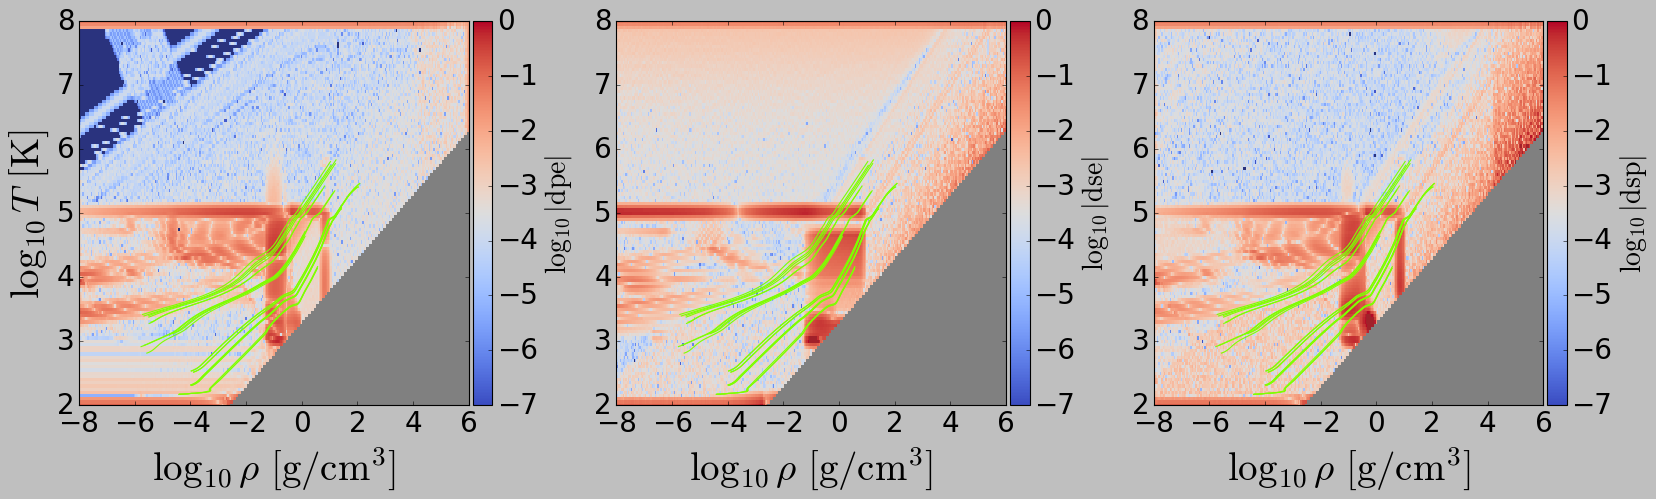

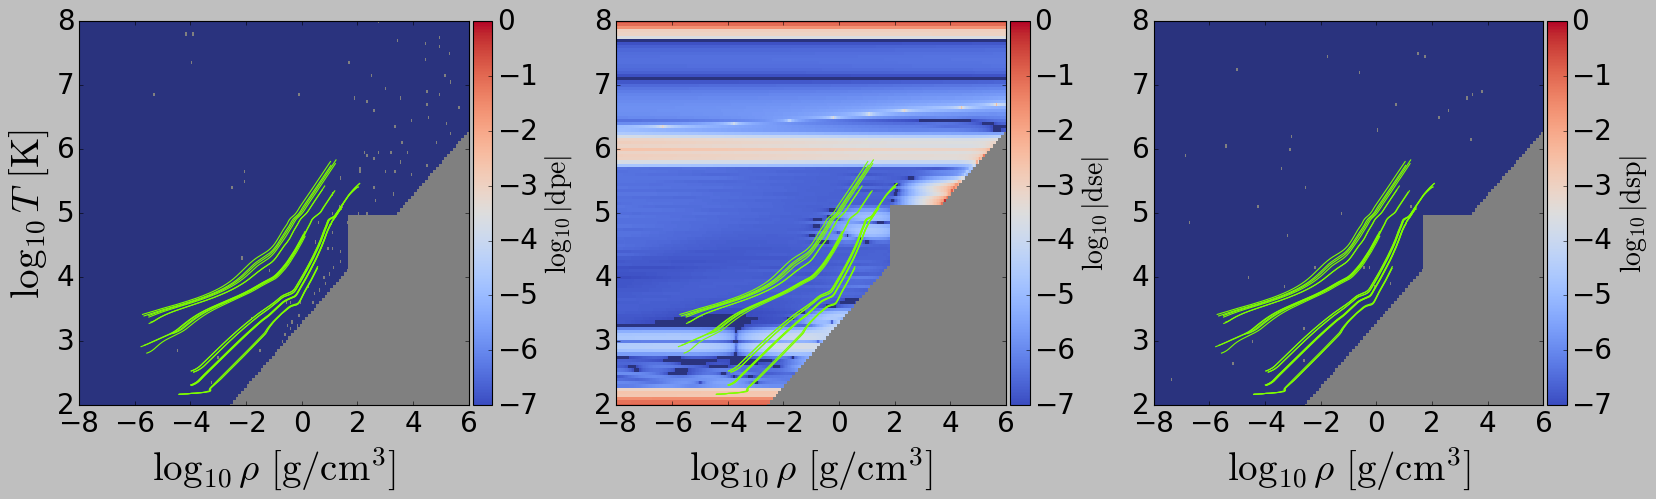

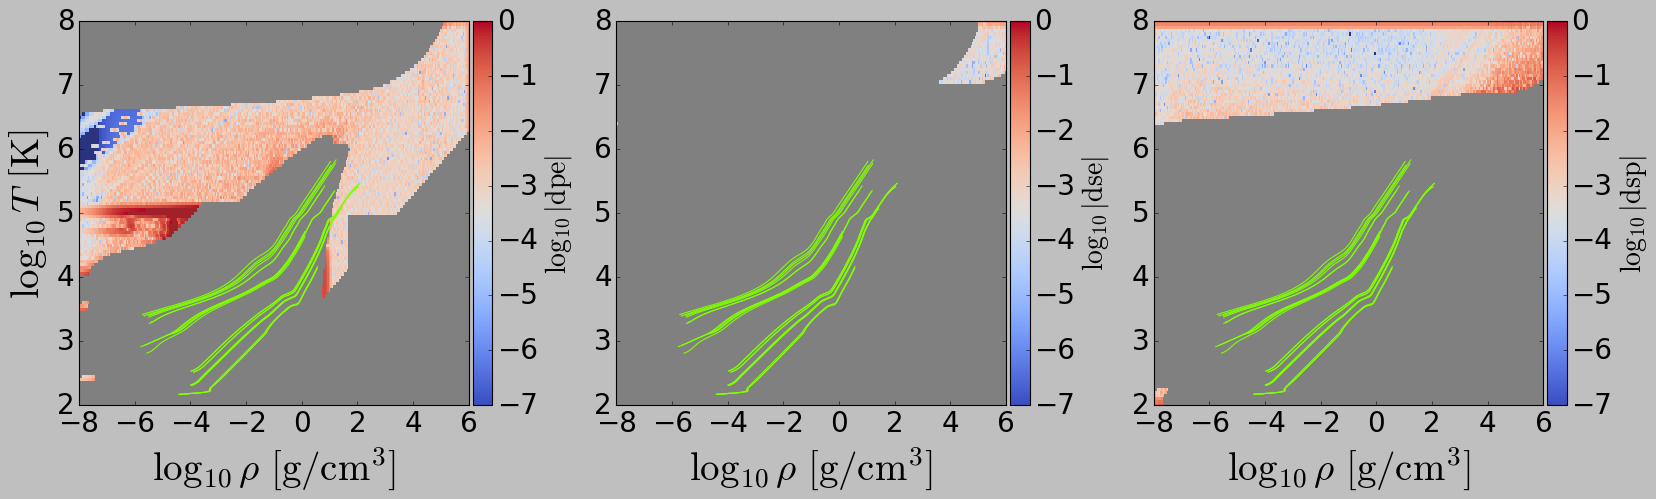

In [50]:
# original

H_dpe, H_dse, H_dsp, H_a, H_b, H_c = meos.consistency_metrics(cms19_H, 
                                                              10**cms19_H.log10Pgrid,10**cms19_H.log10Sgrid,10**cms19_H.log10Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1.pdf")

# F version

F_H_dpe, F_H_dse, F_H_dsp, F_H_a, F_H_b, F_H_c = meos.consistency_metrics(cms19_H, 
                                                                          cms19_H.F_Pgrid,cms19_H.F_Sgrid,cms19_H.F_Egrid,
                                                                          species='H',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1_F.pdf")

# control
control_H_dpe, control_H_dse, control_H_dsp, control_H_a, control_H_b, control_H_c = meos.consistency_metrics(control_H, 
                                                                          10**control_H.log10Pgrid,10**control_H.log10Sgrid,10**control_H.log10Egrid,
                                                                          species='H',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1_F.pdf")


In [51]:
print(control_H_dse[:,0])

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- --]


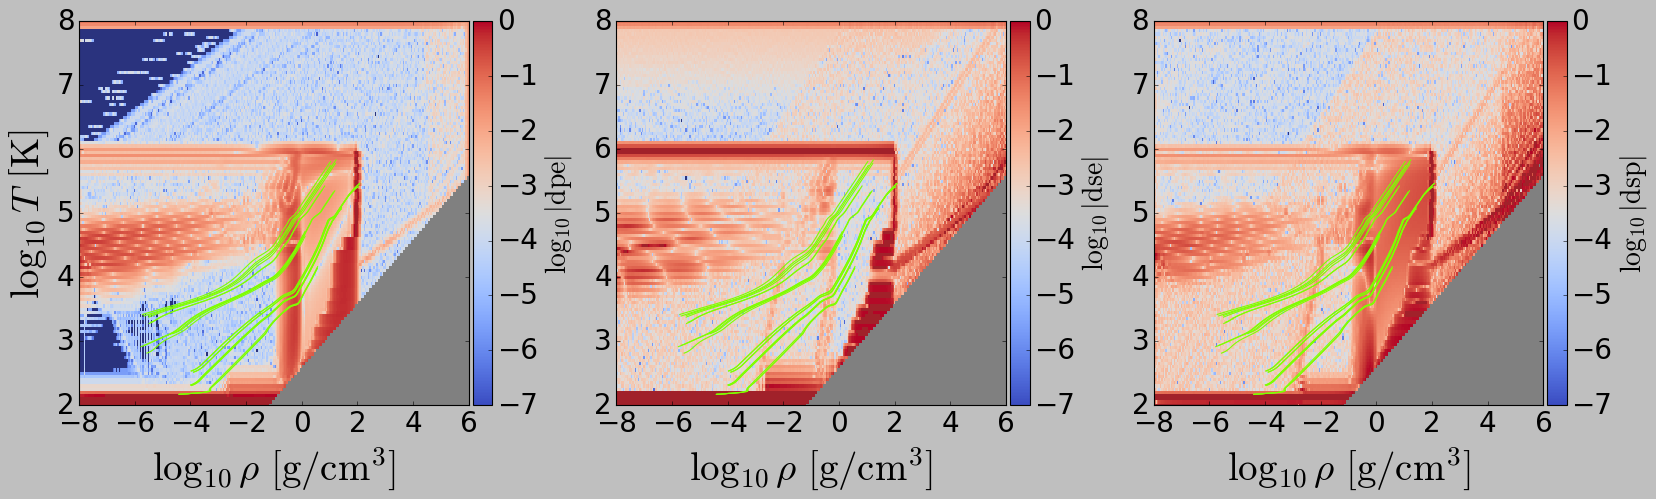

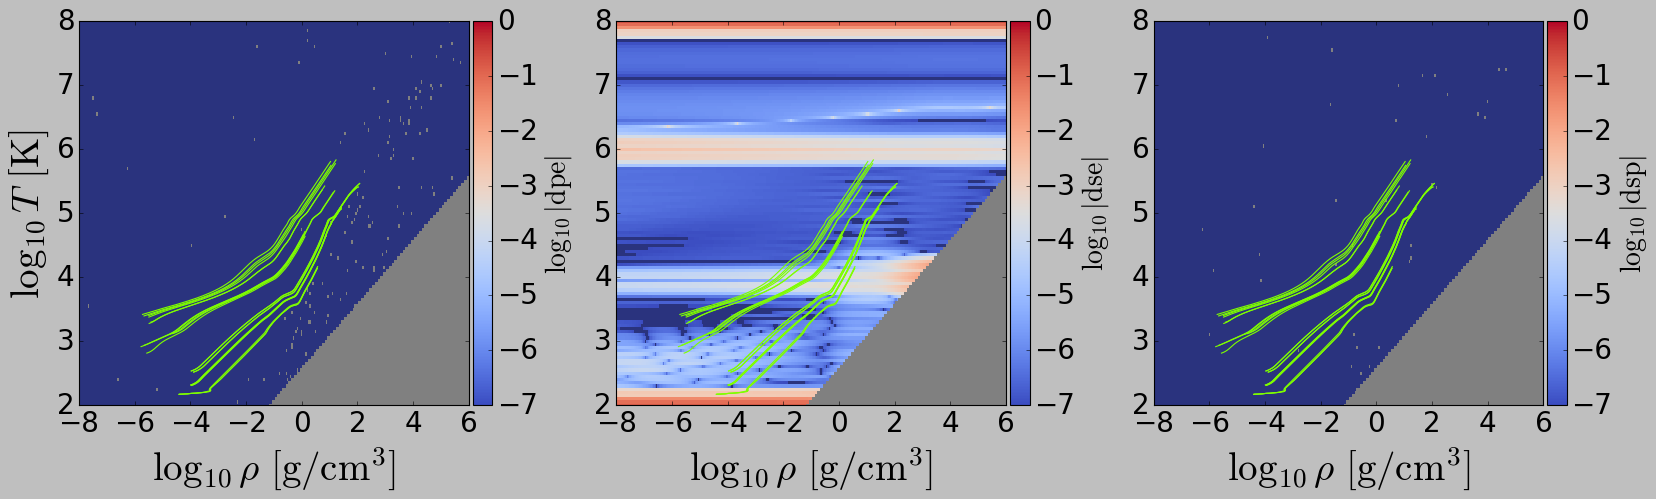

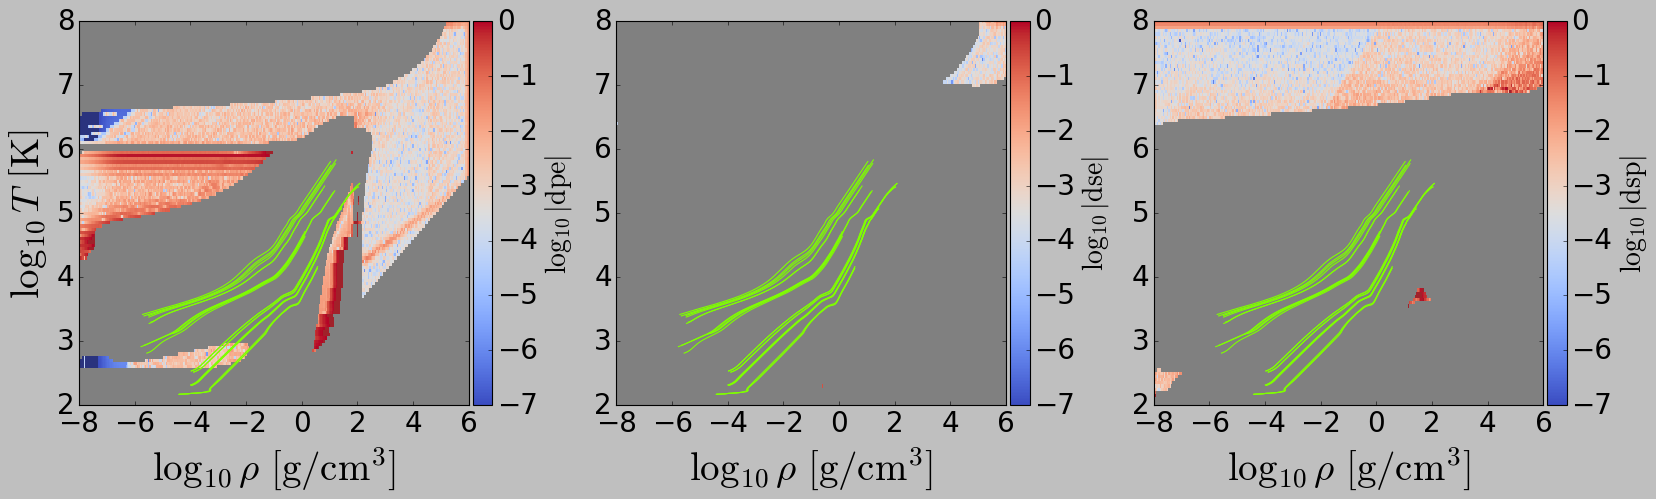

In [52]:
# original
He_dpe, He_dse, He_dsp, He_a, He_b, He_c = meos.consistency_metrics(cms19_He, 
                                                                    10**cms19_He.log10Pgrid,10**cms19_He.log10Sgrid,10**cms19_He.log10Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True)#,savename="./CMS19_Y=1.pdf")

# F version 
F_He_dpe, F_He_dse, F_He_dsp, F_He_a, HF_e_b, F_He_c = meos.consistency_metrics(cms19_He, 
                                                                    cms19_He.F_Pgrid,cms19_He.F_Sgrid,cms19_He.F_Egrid,
                                                                    species='He',maskUnphysicalRegion=False,
                                                                    plot=False,plot_tracks=True, paperplot=True)#,savename="./CMS19_Y=1_F.pdf")

# control
control_He_dpe, control_He_dse, control_He_dsp, control_He_a, control_He_b, control_He_c = meos.consistency_metrics(control_He, 
                                                                          10**control_He.log10Pgrid,10**control_He.log10Sgrid,10**control_He.log10Egrid,
                                                                          species='He',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1_F.pdf")


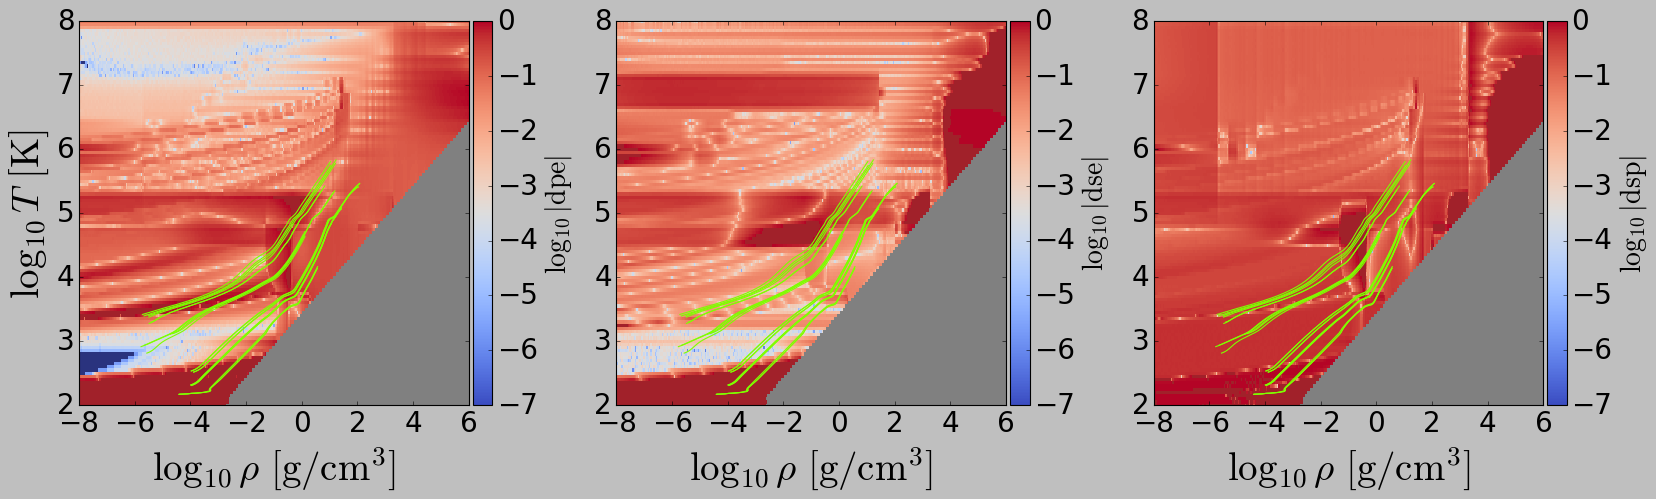

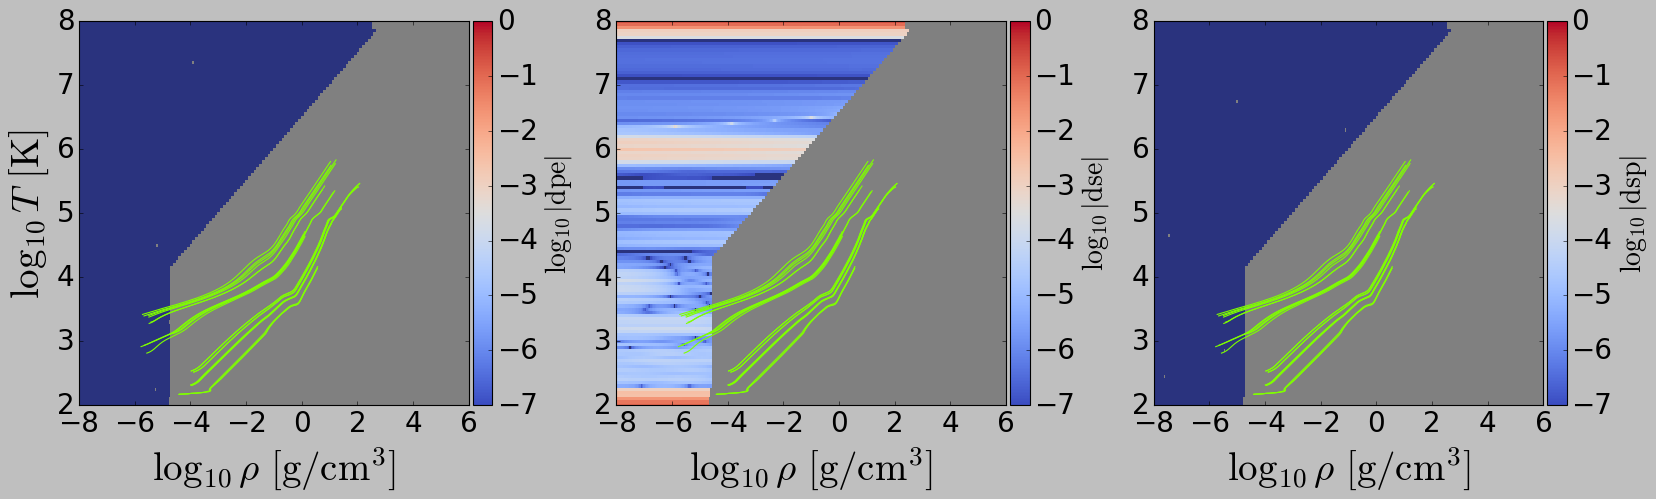

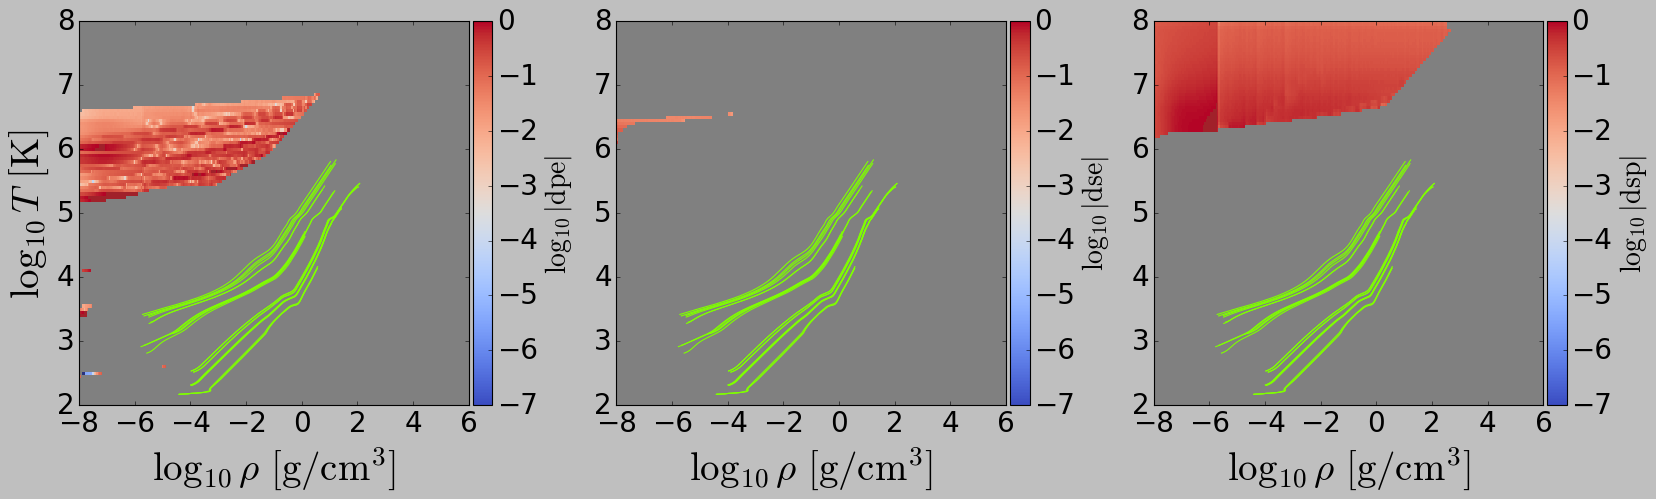

In [53]:
#original
Z_dpe, Z_dse, Z_dsp, Z_a, Z_b, Z_c = meos.consistency_metrics(Z, 
                                                              10**Z.log10Pgrid,10**Z.log10Sgrid,10**Z.log10Ugrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./Zblend.pdf")

# F version
F_Z_dpe, F_Z_dse, F_Z_dsp, F_Z_a, F_Z_b, F_Z_c = meos.consistency_metrics(Z, 
                                                              Z.F_Pgrid,Z.F_Sgrid,Z.F_Egrid,
                                                              species='H',maskUnphysicalRegion=False,
                                                              plot=False,plot_tracks=True,paperplot=True)#, savename="./Zblend_F.pdf")

# control
control_Z_dpe, control_Z_dse, control_Z_dsp, control_Z_a, control_Z_b, control_Z_c = meos.consistency_metrics(control_Z, 
                                                                          10**control_Z.log10Pgrid,10**control_Z.log10Sgrid,10**control_Z.log10Egrid,
                                                                          species='Z',maskUnphysicalRegion=False,
                                                                          plot=False,plot_tracks=True,paperplot=True)#, savename="./CMS19_X=1_F.pdf")
